<a href="https://colab.research.google.com/github/patriciaanggraeni/PCVK_Ganjil_2023/blob/main/week_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tugas Praktikum

### 1. Buat Gamma Correction

In [89]:
import os, glob
import cv2 as cv
import numpy as np

from google.colab import drive
from math import log10, sqrt, pow
from google.colab.patches import cv2_imshow

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Gamma Correction pada citra
---------------------------
Masukkan nilai Gamma: 3


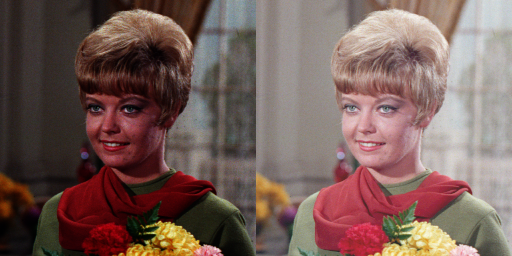

Nilai PSNR: 27.14497116584578 dB


In [84]:
print('Gamma Correction pada citra')
print('---------------------------')

try:
  gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number!')

path = '/content/drive/MyDrive/PCVK/Images/female.tiff'
image = cv.imread(path)
gamma_image = np.zeros(image.shape, image.dtype)

for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    for k in range(image.shape[2]):
      gamma_image[i,j,k] = np.clip(255 * pow(image[i,j,k]/255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((image, gamma_image))
cv2_imshow(final_frame)

psnr_value = PSNR(image, gamma_image)
print(f'Nilai PSNR: {psnr_value} dB')

### 2. Buat Simulasi Image Depth

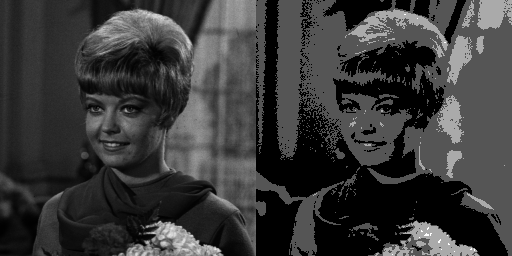

In [87]:
bit_depth = 2
level = 255 / (pow(2,bit_depth)-1)
image = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(image.shape, image.dtype)

for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    depth_image[i,j] = np.clip(round(image[i,j]/level) * level, 0, 255)

final_frame = cv.hconcat((image, depth_image))
cv2_imshow(final_frame)

### 3. Average Denoising

In [ ]:
def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0):
    # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100

  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

nilai psnr-nya adalah 24.17347693897257 dB


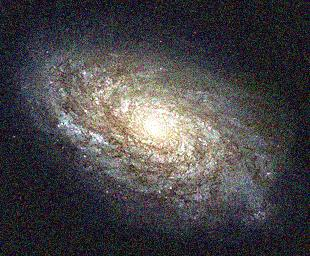

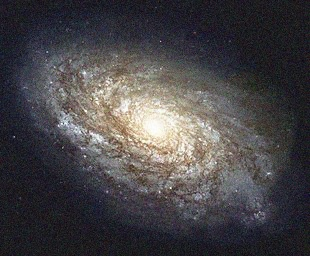

In [149]:
image = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
  n = cv.imread(img)
  image.append(n)

denoised_image = np.zeros(image[0].shape)
count = 5

for i in range(count):
  denoised_image = denoised_image + image[i]

denoised_image = np.uint16(denoised_image / count)
psnr = PSNR(image, denoised_image)

print(f'nilai psnr-nya adalah {psnr} dB')
cv2_imshow(image[0])
cv2_imshow(denoised_image)

In [162]:
path = '/content/drive/MyDrive/PCVK/Images/couple.tiff'
image = cv.imread(path)

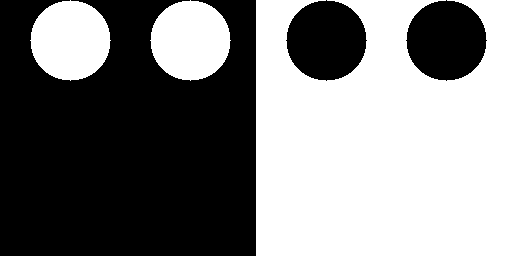

In [169]:
# ----- menggunakan operator not

mask_not = np.zeros(image.shape, dtype=np.uint8)
mask_not = cv.circle(mask_not, (70, 40), 40, (255, 255, 255), -1)
mask_not = cv.circle(mask_not, (190, 40), 40, (255, 255, 255), -1)

result = cv.bitwise_not(mask_not)
final_frame = cv.hconcat((mask_not, result))
cv2_imshow(final_frame)

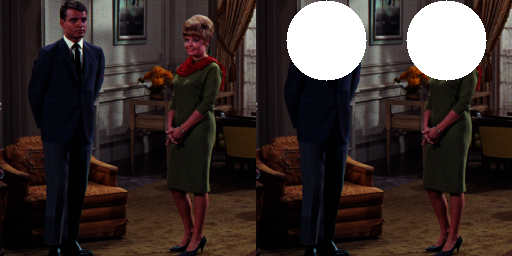

In [148]:
# ----- menggunakan operator or

mask_or = np.zeros(image.shape, dtype=np.uint8)
mask_or = cv.circle(mask_or, (70, 40), 40, (255, 255, 255), -1)
mask_or = cv.circle(mask_or, (190, 40), 40, (255, 255, 255), -1)

result = cv.bitwise_or(image, mask_or)
final_frame = cv.hconcat((image, result))
cv2_imshow(final_frame)

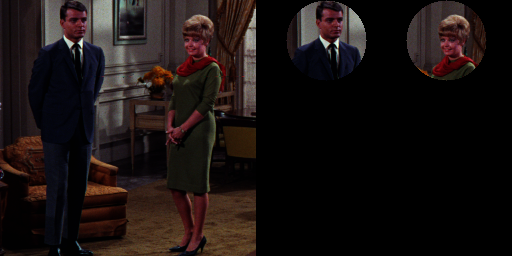

In [151]:
# ----- menggunakan operator and

mask_and = np.zeros(image.shape, dtype=np.uint8)
mask_and = cv.circle(mask_and, (70, 40), 40, (255, 255, 255), -1)
mask_and = cv.circle(mask_and, (190, 40), 40, (255, 255, 255), -1)

result = cv.bitwise_and(image, mask_and)
final_frame = cv.hconcat((image, result))
cv2_imshow(final_frame)

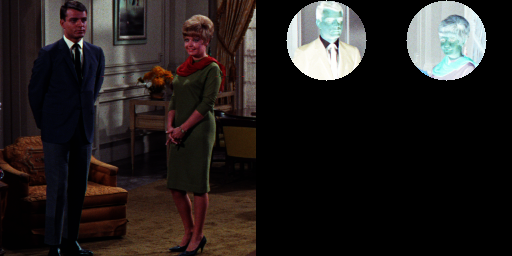

In [153]:
# ----- menggunakan operator nand

mask_and = np.zeros(image.shape, dtype=np.uint8)
mask_and = cv.circle(mask_and, (70, 40), 40, (255, 255, 255), -1)
mask_and = cv.circle(mask_and, (190, 40), 40, (255, 255, 255), -1)

result = cv.bitwise_and(cv.bitwise_not(image), mask_and)
final_frame = cv.hconcat((image, result))
cv2_imshow(final_frame)

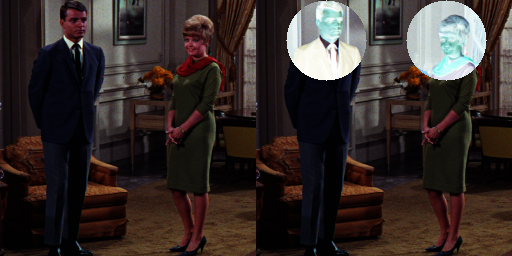

In [152]:
# ----- menggunakan operator xor

mask_xor = np.zeros(image.shape, dtype=np.uint8)
mask_xor = cv.circle(mask_xor, (70, 40), 40, (255, 255, 255), -1)
mask_xor = cv.circle(mask_xor, (190, 40), 40, (255, 255, 255), -1)

result = cv.bitwise_xor(image, mask_and)
final_frame = cv.hconcat((image, result))
cv2_imshow(final_frame)